In [211]:
import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [213]:
df = pd.read_csv('data.csv')

In [214]:
df.columns = df.columns.str.lower().str.replace(' ','_')            #convertir a lista solo las columnas que tengan dtype == object
categorical_columns = list(df.dtypes[df.dtypes =='object'].index)        #guardar columnas categoricas en string_columns
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')             #recorrer la lista creada y usar cada elemento para reemplazar su contenido por minusculas y los espacios por _

log_price = np.log1p(df.msrp)
df['log_price'] = log_price


In [201]:
#creating dummies for categorical columns
df= pd.get_dummies(df, columns= categorical_columns)

In [202]:
#Filling NaNs with the mean.

df.fillna(df.mean(), inplace=True)
del df['msrp']

<h4>Creating the training sets and starting the model

In [204]:
X = df.drop('log_price', axis=1)
y = df['log_price']

In [205]:
    # Create an instance of StandardScaler
scaler = StandardScaler()
    # Fit the scaler
X_scaled = scaler.fit_transform(X)

    # split data to 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=42)

In [206]:
# train model
model = Ridge(alpha=.1)
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

In [207]:
# Inverse log transform to get the actual prices
predicted_prices = np.expm1(y_pred)
actual_prices = np.expm1(y_test)


In [208]:
# Compute MSE and accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse*100)
print('Accuracy: ', r2*100)

MSE:  4.234821164929046
Accuracy:  96.55214528318874


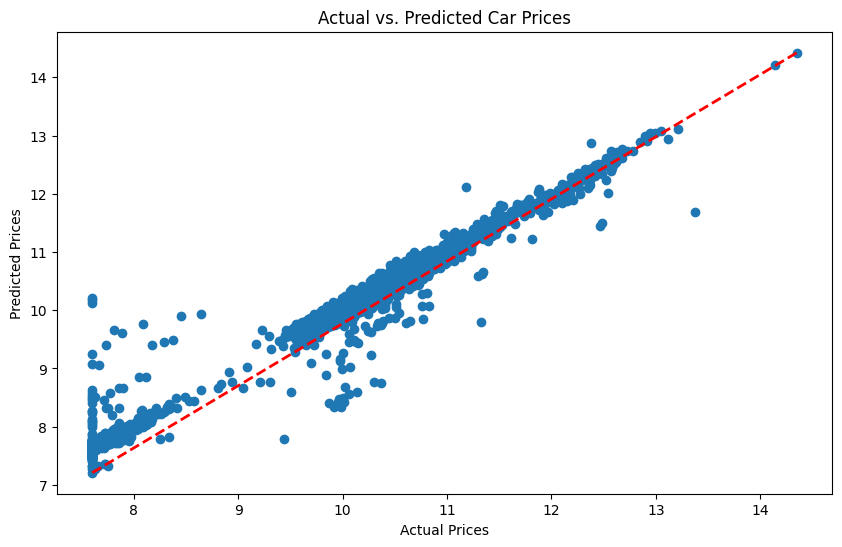

In [209]:
# Plotting the linear line of the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()